# SPORTS CELEBRITY IMAGE CLASSIFICATION


In [1]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

# (1) Preprocessing: Detect face and eyes


In [2]:
img = cv2.imread('./test_images/virat.jpg')
img.shape

(192, 192, 3)

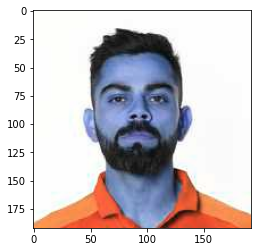

In [3]:
plt.imshow(img)

In [4]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(192, 192)

In [5]:
gray

array([[254, 254, 254, ..., 254, 254, 254],
       [254, 254, 254, ..., 254, 254, 254],
       [254, 254, 254, ..., 254, 254, 254],
       ...,
       [158, 150, 142, ..., 124, 124, 124],
       [155, 150, 142, ..., 123, 123, 122],
       [143, 143, 143, ..., 123, 122, 122]], dtype=uint8)

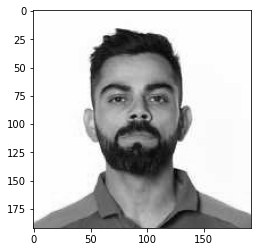

In [6]:
plt.imshow(gray,cmap='gray')

In [7]:
face_cascade = cv2.CascadeClassifier('./opencv_haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv_haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray,1.3,5)
faces


array([[44, 36, 98, 98]])

In [8]:
(x,y,w,h) = faces[0]
x,y,w,h

(44, 36, 98, 98)

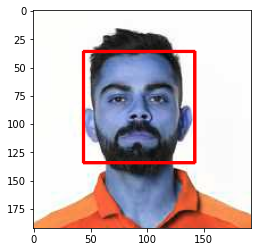

In [9]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

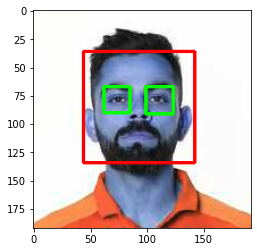

In [10]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for(ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        
plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

# (2) Preprocessing: Crop the facial region of the image

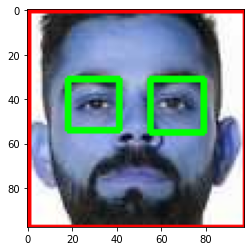

In [11]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

# (3) Preprocessing: Load image, detect face. If eyes >=2, then save and crop the face region

In [12]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray,1.3,5)
    for(x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes)>=2 :
            return roi_color

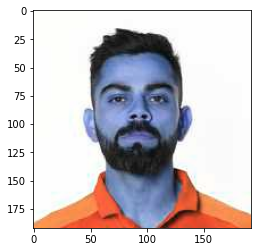

In [13]:
original_image = cv2.imread('./test_images/virat.jpg')
plt.imshow(original_image)

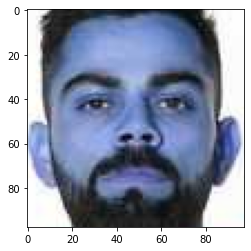

In [14]:
cropped_image = get_cropped_image_if_2_eyes('./test_images/virat.jpg')
plt.imshow(cropped_image)

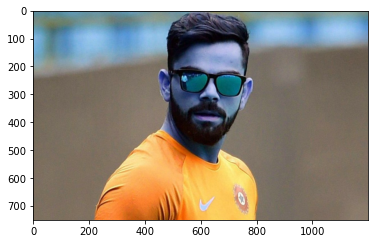

In [15]:
original_image_obstructed = cv2.imread('./test_images/virat2.jpg')
plt.imshow(original_image_obstructed)

In [16]:
cropped_image2 = get_cropped_image_if_2_eyes('./test_images/virat2.jpg')
cropped_image2

In [17]:
path_to_data = "./dataset/"
path_to_cr_data = "./dataset/cropped/"

In [18]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [19]:
img_dirs

['./dataset/cropped',
 './dataset/lionel_messi',
 './dataset/maria_sharapova',
 './dataset/roger_federer',
 './dataset/serena_williams',
 './dataset/virat_kohli']

Go through all images in dataset folder and create cropped images for them. There will be cropped folder inside dataset folder after you run this code

In [20]:
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [21]:
cropped_image_dir = []
celebrity_file_name_dict = {}

for img_dir in img_dirs:
    count=1
    celebrity_name = img_dir.split('/')[-1]
    celebrity_file_name_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dir.append(cropped_folder)
                print("Genrating cropped images in folder:",cropped_folder)
                
            cropped_file_name = celebrity_name + str(count)+".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_name_dict[celebrity_name].append(cropped_file_path)
            count += 1
            
        

Genrating cropped images in folder: ./dataset/cropped/lionel_messi
Genrating cropped images in folder: ./dataset/cropped/maria_sharapova
Genrating cropped images in folder: ./dataset/cropped/roger_federer
Genrating cropped images in folder: ./dataset/cropped/serena_williams
Genrating cropped images in folder: ./dataset/cropped/virat_kohli


# (4) Preprocessing: Use wavelet transform as a feature for traning our model

In [22]:
import numpy as np
import pywt
import cv2

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype Conversion
    #Convert to grayscale
    imArray = cv2.cvtColor(imArray,cv2.COLOR_RGB2GRAY)
    #Convert to float
    imArray = np.float32(imArray)
    imArray /= 255;
    #Compute Coefficients
    coeffs = pywt.wavedec2(imArray,mode,level=level)
    
    #Process Coefficients
    coeffs_H = list(coeffs)
    coeffs_H[0] *= 0;
    
    #Reconstruction
    imArray_H=pywt.waverec2(coeffs_H,mode);
    imArray_H *= 255;
    imArray_H = np.uint8(imArray_H)
    
    return imArray_H

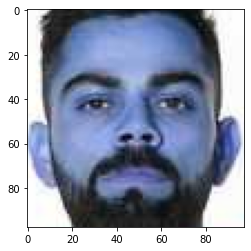

In [23]:
cropped_image1 = get_cropped_image_if_2_eyes('./test_images/virat.jpg')
plt.imshow(cropped_image1)

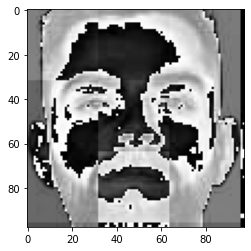

In [24]:
im_har = w2d(cropped_image1,'db1',5)
plt.imshow(im_har, cmap = 'gray')

In [25]:
# Manually examine cropped folder and delete any unwanted images
celebrity_file_names_dict = {}
for img_dir in cropped_image_dir:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'lionel_messi': ['./dataset/cropped/lionel_messi\\lionel_messi1.png',
  './dataset/cropped/lionel_messi\\lionel_messi10.png',
  './dataset/cropped/lionel_messi\\lionel_messi11.png',
  './dataset/cropped/lionel_messi\\lionel_messi12.png',
  './dataset/cropped/lionel_messi\\lionel_messi13.png',
  './dataset/cropped/lionel_messi\\lionel_messi14.png',
  './dataset/cropped/lionel_messi\\lionel_messi15.png',
  './dataset/cropped/lionel_messi\\lionel_messi16.png',
  './dataset/cropped/lionel_messi\\lionel_messi17.png',
  './dataset/cropped/lionel_messi\\lionel_messi18.png',
  './dataset/cropped/lionel_messi\\lionel_messi19.png',
  './dataset/cropped/lionel_messi\\lionel_messi2.png',
  './dataset/cropped/lionel_messi\\lionel_messi20.png',
  './dataset/cropped/lionel_messi\\lionel_messi21.png',
  './dataset/cropped/lionel_messi\\lionel_messi22.png',
  './dataset/cropped/lionel_messi\\lionel_messi23.png',
  './dataset/cropped/lionel_messi\\lionel_messi24.png',
  './dataset/cropped/lionel_messi\

In [26]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_name_dict.keys():
    class_dict[celebrity_name]=count
    count = count+1
class_dict

{'cropped': 0,
 'lionel_messi': 1,
 'maria_sharapova': 2,
 'roger_federer': 3,
 'serena_williams': 4,
 'virat_kohli': 5}

#### Images in cropped folder can be used for model training. We will use these raw images along with wavelet transformed images to train our classifier. Let's prepare X and y now

In [27]:
X, y = [],[]
for celebrity_name, training_files in celebrity_file_name_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is None:
            continue
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])

In [28]:
len(X[0])

4096

In [29]:
32*32*3 + 32*32

4096

In [30]:
X[0]

array([[100],
       [129],
       [140],
       ...,
       [237],
       [234],
       [232]], dtype=uint8)

In [31]:
y[0]

1

In [32]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(187, 4096)

### Data cleaning process is done. Now train the model

We will use SVM with rbf kernel tuned with heuristic finetuning

In [33]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [34]:
x_train,x_test,y_train,y_test = train_test_split(X,y,random_state=0)
pipe = Pipeline([('scaler',StandardScaler()),('svc',SVC(kernel='rbf',C=10))])
pipe.fit(x_train, y_train)
pipe.score(x_test, y_test)

0.8723404255319149

In [35]:
print(classification_report(y_test, pipe.predict(x_test)))

              precision    recall  f1-score   support

           1       0.89      0.80      0.84        10
           2       0.89      1.00      0.94         8
           3       0.80      0.67      0.73         6
           4       0.90      0.82      0.86        11
           5       0.86      1.00      0.92        12

    accuracy                           0.87        47
   macro avg       0.87      0.86      0.86        47
weighted avg       0.87      0.87      0.87        47



##### Use Gridsearch to try out different models with different paramets. Goal is to come up with best modle with best fine tuned parameters

In [36]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [37]:
model_params = {
    'svm':{
        'model': svm.SVC(gamma='auto', probability=True),
        'params':{
            'svc__C':[1,10,100,1000],
            'svc__kernel':['rbf','linear']
        }
    },
    'random_forest':{
        'model': RandomForestClassifier(),
        'params':{
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression':{
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C':[1,5,10]
        }
    }
}

In [38]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(),mp['model'])
    clf = GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(x_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_

    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.728571,"{'svc__C': 10, 'svc__kernel': 'rbf'}"
1,random_forest,0.585714,{'randomforestclassifier__n_estimators': 5}
2,logistic_regression,0.728571,{'logisticregression__C': 1}


In [39]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc', SVC(C=10, gamma='auto', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=5))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [40]:
best_estimators['svm'].score(x_test,y_test)

0.8723404255319149

In [41]:
best_estimators['random_forest'].score(x_test,y_test)

0.5106382978723404

In [42]:
best_estimators['logistic_regression'].score(x_test,y_test)

0.851063829787234

In [43]:
best_clf = best_estimators['svm']

In [44]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,best_clf.predict(x_test))
cm

array([[ 8,  0,  1,  1,  0],
       [ 0,  8,  0,  0,  0],
       [ 1,  0,  4,  0,  1],
       [ 0,  1,  0,  9,  1],
       [ 0,  0,  0,  0, 12]], dtype=int64)

Text(69.0, 0.5, 'Truth')

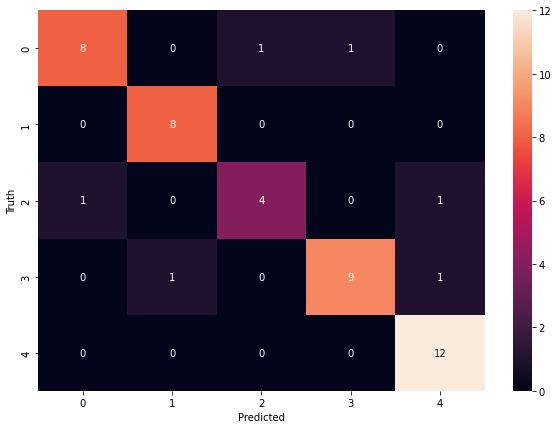

In [45]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [46]:
class_dict

{'cropped': 0,
 'lionel_messi': 1,
 'maria_sharapova': 2,
 'roger_federer': 3,
 'serena_williams': 4,
 'virat_kohli': 5}

### Save the trained model

In [47]:
!pip install joblib
import joblib
#Save the model as a pickle in a file
joblib.dump(best_clf,'saved_model.pkl')

['saved_model.pkl']

### Save class dictionary

In [48]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))

#### This is the final output To make this project more accessible and user-friendly, I deployed the sports person classification model using a Flask server. The Flask server provided a RESTful API for seamless interaction between the model and the user interface. This allowed users to upload images, and the server would respond with the predicted sports person classes in real-time

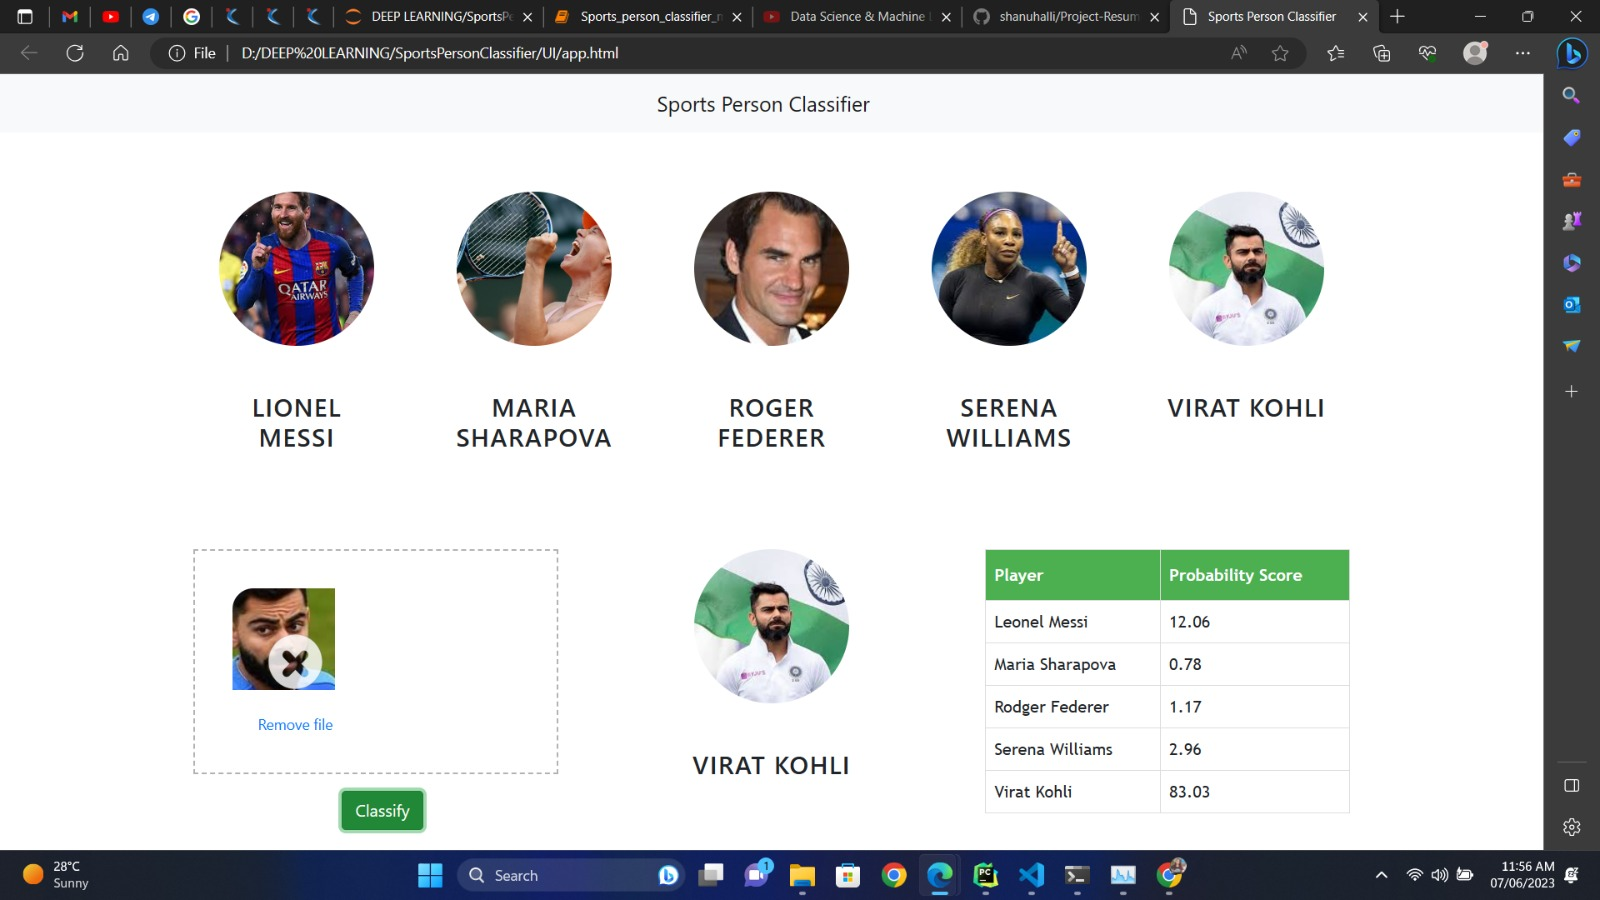